<font color='Black'><b>Описание проекта:</b></font><br>

Для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры, нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
Данные до 2016 года. Нужно отработать принцип работы с данными. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


<font color='Black'><b>План исследования:</b></font><br>

1. Открыть файл с данными и изучить общую информацию.
2. Подготовить данные:

        2.1	Заменить названия столбцов (привести к нижнему регистру);
        2.2	Преобразовать данные в нужные типы. Описать, в каких столбцах изменен тип данных и почему;
        2.3	Обработать пропуски при необходимости;
        2.4	Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

3. Провести исследовательский анализ данных:

        3.1	Проверить, сколько игр выпускалось в разные годы; 
        3.2	Проверить, как менялись продажи по платформам, выбрать платформы с наибольшими суммарными продажами и построить распределение по годам;
        3.3	Взять данные за соответствующий актуальный период;
        3.4	Определить какие платформы лидируют по продажам, растут или падают;
        3.5	Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам и описать результат;
        3.6	Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков; 
        3.7 Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами;
        3.8	Соотнести выводы с продажами игр на других платформах;
        3.9	Посмотреть на общее распределение игр по жанрам, определить самые прибыльные жанры, проверить выделяются ли жанры с высокими и низкими продажами.

4. Составить портрет пользователя каждого региона (NA, EU, JP):

        4.1 Самые популярные платформы (топ-5). Описать различия в долях продаж;
        4.2 Самые популярные жанры (топ-5). Объяснить разницу;
        4.3 Проверить влияет ли рейтинг ESRB на продажи в отдельном регионе.

5. Проверить гипотезы:

        5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
        5.2 Средние пользовательские рейтинги жанров Action и Sports разные.

6. Сделать общий вывод.


#### Открыть файл с данными и изучить общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import factorial
from math import sqrt
from scipy import stats as st
from scipy.stats import binom, norm
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Предобработка данных

2.1 Заменим названия столбцов (приведем к нижнему регистру):

In [4]:
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


2.2 Преобразуем данные в нужные типы:

In [5]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y').dt.year
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [6]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') 
# аббревиатура 'tbd' в столбце с оценкой пользователей принудительно заменяется на NaN

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Тип данных измнили в двух столбцах:

- year_of_release — год выпуска в тип datetime64[ns]

- user_score — оценка пользователей (максимум 10) в тип float64     

2.3 Обработаем пропуски при необходимости:

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [9]:
data['name'] = data['name'].fillna('unknown') 

data['genre'] = data['genre'].fillna('')
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)
data['rating'] = data['rating'].fillna('')

In [10]:
data.isna().sum()

name                 0
platform             0
year_of_release    269
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

Пропуски в столбцах critic_score, user_score и rating могли возникнуть из-за того, что игры не популярны. Заполнение каким-либо значением может сместить наши оценки.

In [11]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,0.000000
user_score,0.000000


In [12]:
data.dropna(subset = ['year_of_release'], inplace= True)

In [13]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

2.4 Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец: 

In [14]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,,0.01


<font color='Black'><b>Общий вывод после предобработки данных:  </b></font><br>

- заменили названия столбцов;
- преобразовали данные в нужные типы данных;
- обработали пропуски;
- посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

In [15]:
data.duplicated().sum() # Проверим наличие дубликатов

0

Явные дубликаты отсутствуют 

In [16]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
659,unknown,GEN,1993,,1.78,0.53,0.00,0.08,-1.0,-1.0,,2.39
14244,unknown,GEN,1993,,0.00,0.00,0.03,0.00,-1.0,-1.0,,0.03
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01


#### Исследовательский анализ данных

3.1 Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [17]:
data.groupby('year_of_release')['name'].count().sort_values(ascending=False)

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: name, dtype: int64

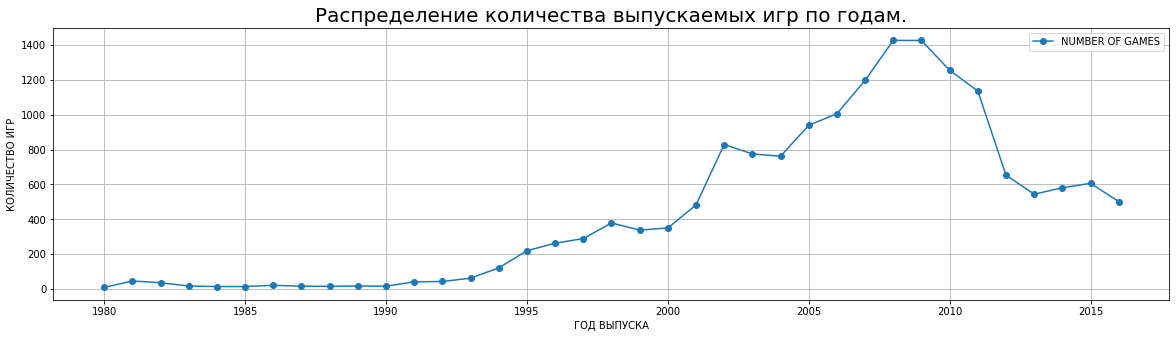

In [18]:
plt.figure(figsize=(20, 5))
plt.title('Распределение количества выпускаемых игр по годам.', fontsize=20)
plt.ylabel('КОЛИЧЕСТВО ИГР')
plt.xlabel('ГОД ВЫПУСКА')
plt.plot(data.groupby('year_of_release')['name'].count(), 'o-', label='NUMBER OF GAMES', alpha=1)
plt.grid(True)
plt.legend();

Вывод: рост количества выпускаемых компьютерных игр идет в период с 1991 по 2008 год, в 2008 максимальное количество выпущенных игр - 1427. После 2008 количество выпускаемых игр идет на спад. До 1991 года количество игр держится примерно на одном уровне.

3.2 Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [19]:
total_sales = data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)

total_sales

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sum_sales, dtype: float64

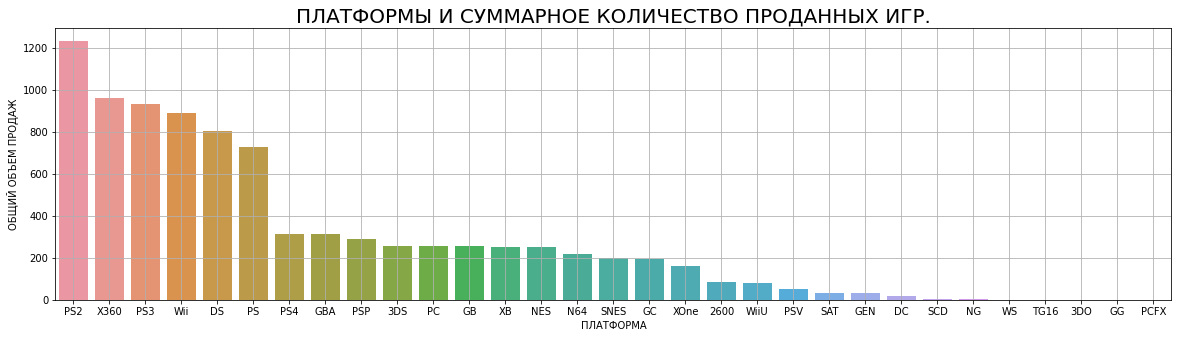

In [20]:
plt.figure(figsize=(20, 5))
plt.title('ПЛАТФОРМЫ И СУММАРНОЕ КОЛИЧЕСТВО ПРОДАННЫХ ИГР.', fontsize=20)
sns.barplot(x=total_sales.index, y=total_sales)
plt.ylabel('ОБЩИЙ ОБЪЕМ ПРОДАЖ')
plt.xlabel('ПЛАТФОРМА')
plt.grid(True);

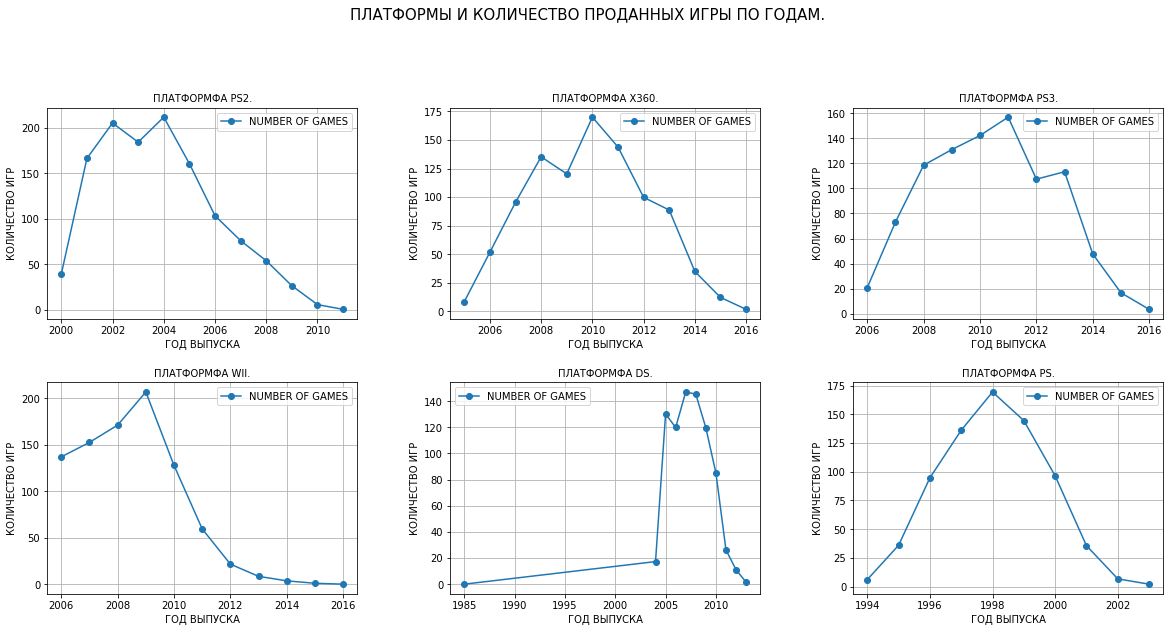

In [21]:
position = 0

top_platform = total_sales.reset_index()['platform'].head(6)

plt.figure(figsize=[20, 14])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle('ПЛАТФОРМЫ И КОЛИЧЕСТВО ПРОДАННЫХ ИГРЫ ПО ГОДАМ.', fontsize=15)

for name_of_platform in top_platform:
    position += 1
    pvt = data.query('platform == @name_of_platform').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
    plt.subplot(3, 3, position)
    plt.title(f'ПЛАТФОРМФA {name_of_platform.upper()}.', fontsize=10)
    plt.plot(pvt, 'o-', label='NUMBER OF GAMES', alpha=1)
    plt.ylabel('КОЛИЧЕСТВО ИГР')
    plt.xlabel('ГОД ВЫПУСКА')
    plt.grid(True)
    plt.legend()
plt.show();

По графикам заметно, что характерный срок появления новой и исчезновения старой платформы - около 10 лет

3.3 Возьмем данные за соответствующий актуальный период (5 лет). 
Основной фактор — эти данные помогут построить прогноз на 2017 год.
Берем данные соответственно с 2012 года.

3.4 Не учитываем в работе данные за предыдущие годы:

In [22]:
data_actual = data.query('year_of_release>=2012')
data_actual 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,,0.01


3.5 Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

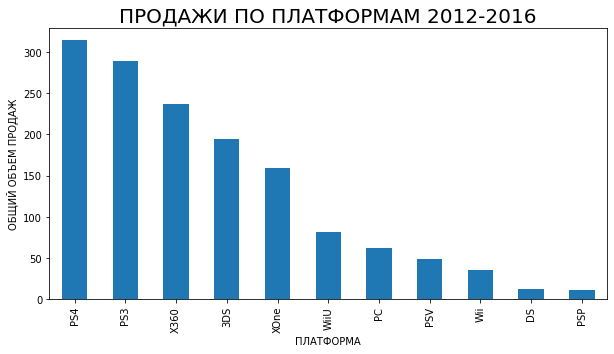

In [23]:
data_actual.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).plot(figsize=(10,5),kind="bar")
plt.title('ПРОДАЖИ ПО ПЛАТФОРМАМ 2012-2016', fontsize=20)
plt.ylabel('ОБЩИЙ ОБЪЕМ ПРОДАЖ')
plt.xlabel('ПЛАТФОРМА')
plt.show()

Явные лидеры по продажам с 2012 по 2016:
   - PS4
   - PS3
   - X360
   - 3DS	
   - XOne

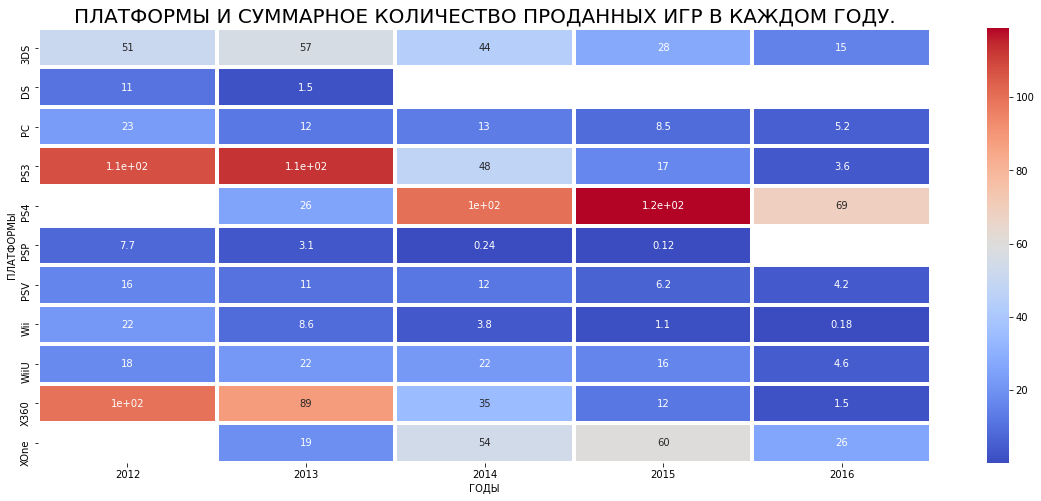

In [24]:
plt.figure(figsize=(20, 8))
plt.title('ПЛАТФОРМЫ И СУММАРНОЕ КОЛИЧЕСТВО ПРОДАННЫХ ИГР В КАЖДОМ ГОДУ.', fontsize=20)
(sns
 .heatmap(data_actual.pivot_table(index='platform', columns='year_of_release', values='sum_sales', aggfunc='sum'), annot=True, cmap="coolwarm",linewidths=3))
plt.ylabel('ПЛАТФОРМЫ')
plt.xlabel('ГОДЫ')
plt.grid(False);

Потенциально прибыльными (растущими) платформами будут: 
   - PS4
   - XOne
   - 3DS

Продажи падают у платформ:
   - PS3
   - X360
   - Wii


3.6 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

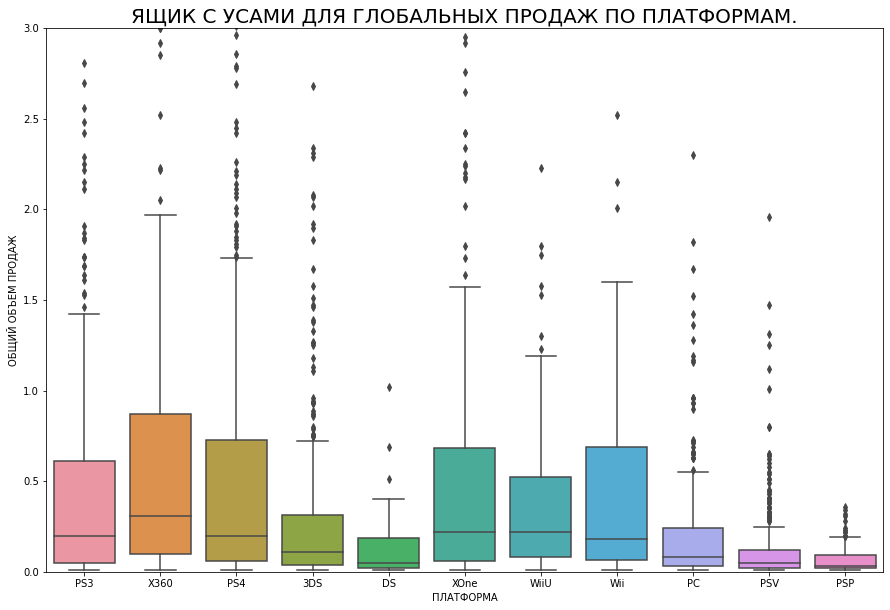

In [25]:
plt.figure(figsize=(15,10))
plt.ylim(0,3)
sns.boxplot(x='platform', y='sum_sales',data=data_actual)
plt.title('ЯЩИК С УСАМИ ДЛЯ ГЛОБАЛЬНЫХ ПРОДАЖ ПО ПЛАТФОРМАМ.', fontsize=20)
plt.ylabel('ОБЩИЙ ОБЪЕМ ПРОДАЖ')
plt.xlabel('ПЛАТФОРМА')
plt.show()

- Большего всего продаются (2012-2016) игры для: 
   - PS3;
   - X360;
   - PS4;
   - XOne;
   - WiiU;
   - Wii.

- Распределение скошенно вправо, следовательно медианы меньше среднего.
- Если взять топ-5 платформ, то их "ящики с усами" схожи(медиана в районе 0.2).

3.7 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [26]:
data_actual_ps4 = data_actual[(data_actual['platform'] == 'PS4') & (data_actual['user_score'] != -1) & (data_actual['critic_score'] != -1)] # Посмотрим на примере платформы PS4
data_actual_ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16486,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.00,42.0,2.3,E10+,0.01
16499,Sherlock Holmes: The Devil's Daughter,PS4,2016,Adventure,0.01,0.00,0.00,0.00,70.0,6.8,T,0.01
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01


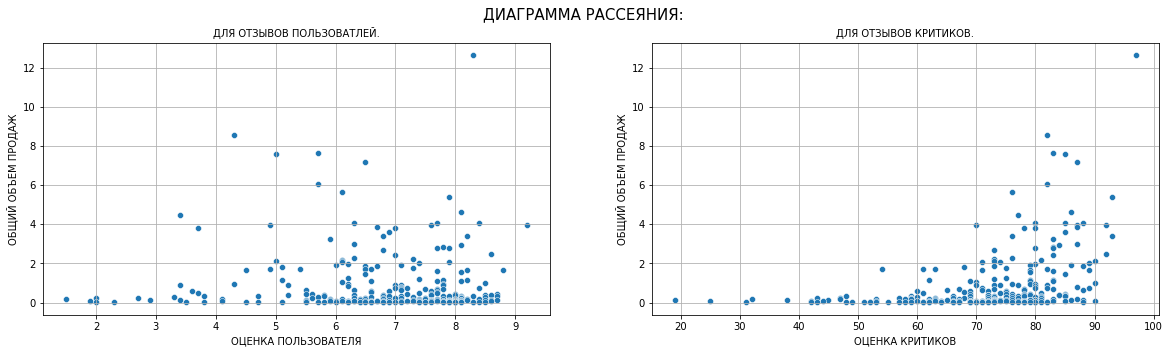

In [27]:
plt.figure(figsize=(20, 5))
plt.suptitle('ДИАГРАММА РАССЕЯНИЯ:', fontsize=15)

plt.subplot(1, 2, 1)
plt.title('ДЛЯ ОТЗЫВОВ ПОЛЬЗОВАТЛЕЙ.', fontsize=10)
sns.scatterplot(x='user_score', y='sum_sales', data=data_actual_ps4)
plt.ylabel('ОБЩИЙ ОБЪЕМ ПРОДАЖ')
plt.xlabel('ОЦЕНКА ПОЛЬЗОВАТЕЛЯ')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('ДЛЯ ОТЗЫВОВ КРИТИКОВ.', fontsize=10)
sns.scatterplot(x='critic_score', y='sum_sales', data=data_actual_ps4)
plt.ylabel('ОБЩИЙ ОБЪЕМ ПРОДАЖ')
plt.xlabel('ОЦЕНКА КРИТИКОВ')
plt.grid(True);

In [28]:
corr_critic_score = data_actual_ps4['sum_sales'].corr(data_actual_ps4['critic_score'].astype('float32'))
corr_user_score = data_actual_ps4['sum_sales'].corr(data_actual_ps4['user_score'])
print(f'\nКоэффицент корреляции для отзывов критиков - {corr_critic_score:.2f}')
print(f'\nКоэффицент корреляции для отзывов пользователей - {corr_user_score:.2f}')


Коэффицент корреляции для отзывов критиков - 0.41

Коэффицент корреляции для отзывов пользователей - -0.03


3.8 Выводы: 
- Зависимость количества продаж от оценки критиков есть, но слабая. Корреляция положительная (лучше отзыв - больше продаж).
- Зависимость продаж от оценки пользователей почти отсутствует.


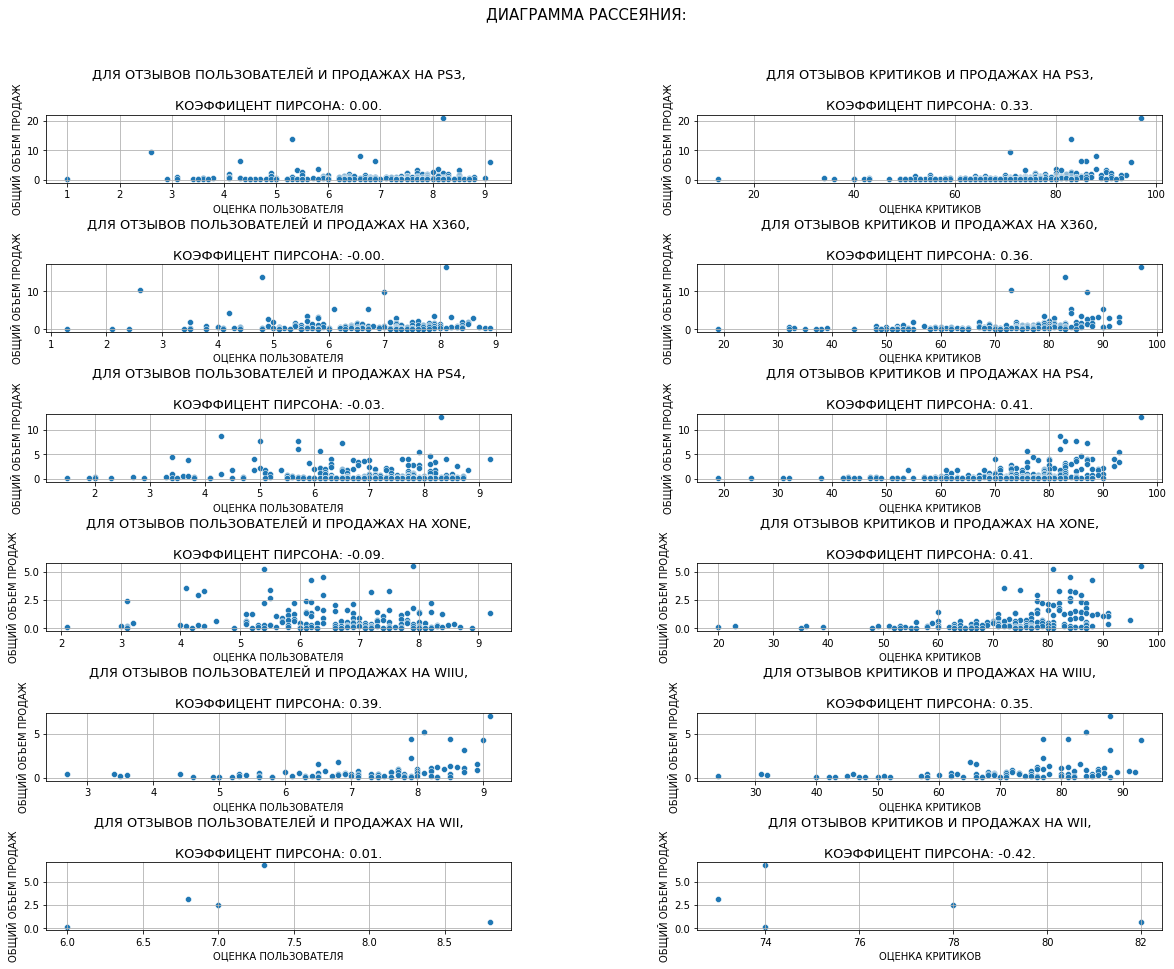

In [29]:
list_platforms = ['PS3', 'X360', 'PS4', 'XOne', 'WiiU', 'Wii']

position = 0
plt.figure(figsize=[20,15])
plt.subplots_adjust(wspace=0.4, hspace=1.2)
plt.suptitle('ДИАГРАММА РАССЕЯНИЯ:', fontsize=15)

for name_of_platform in list_platforms:
    position += 1
    df_for_console = data_actual[(data_actual['platform'] == name_of_platform) & (data_actual['user_score'] != -1) & (data_actual['critic_score'] != -1)]
    
    plt.subplot(6, 2, position)
    cor_with_user_score = df_for_console['sum_sales'].corr(df_for_console['user_score'])
    plt.title(f'ДЛЯ ОТЗЫВОВ ПОЛЬЗОВАТЕЛЕЙ И ПРОДАЖАХ НА {name_of_platform.upper()},\n\nКОЭФФИЦЕНТ ПИРСОНА: {cor_with_user_score:.2f}.', fontsize=13)
    sns.scatterplot(x='user_score', y='sum_sales', data=df_for_console)
    plt.xlabel('ОЦЕНКА ПОЛЬЗОВАТЕЛЯ')
    plt.ylabel('ОБЩИЙ ОБЪЕМ ПРОДАЖ')
    plt.grid(True)
    
    position += 1
    plt.subplot(6, 2, position)
    cor_with_critic_score = df_for_console['sum_sales'].corr(df_for_console['critic_score'].astype('float32'))
    plt.title(f'ДЛЯ ОТЗЫВОВ КРИТИКОВ И ПРОДАЖАХ НА {name_of_platform.upper()},\n\nКОЭФФИЦЕНТ ПИРСОНА: {cor_with_critic_score:.2f}.', fontsize=13)
    sns.scatterplot(x='critic_score', y='sum_sales', data=df_for_console)
    plt.xlabel('ОЦЕНКА КРИТИКОВ')
    plt.ylabel('ОБЩИЙ ОБЪЕМ ПРОДАЖ')
    plt.grid(True);

    
- Влияние отзывов пользователей на продажи велико для WIIU. 
- Влияние мнения критиков значительно выше влияния пользователских оценок, можно предположить, что данное являение может иметь определенный успех в будущем для продаж.



3.9 Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

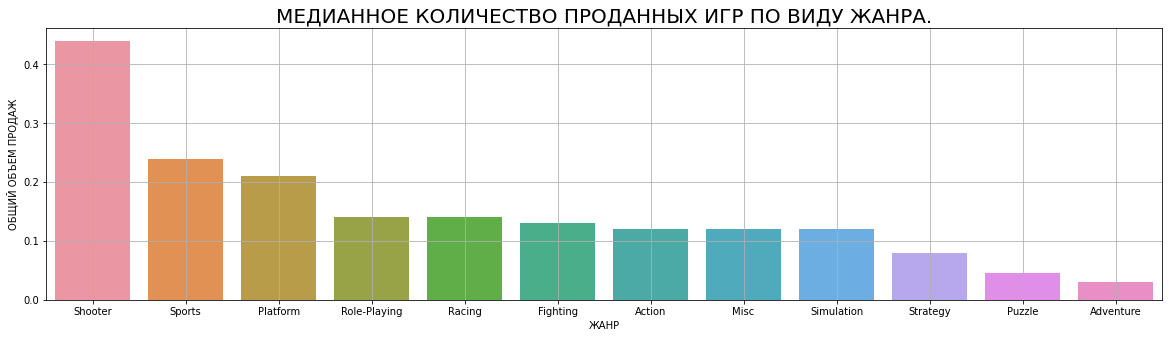

In [30]:
genre = data_actual.pivot_table(index='genre', values='sum_sales', aggfunc='median').sort_values(by='sum_sales', ascending=False).reset_index()
plt.figure(figsize=(20, 5))
plt.title('МЕДИАННОЕ КОЛИЧЕСТВО ПРОДАННЫХ ИГР ПО ВИДУ ЖАНРА.', fontsize=20)
sns.barplot(x='genre', y='sum_sales', data=genre)
plt.ylabel('ОБЩИЙ ОБЪЕМ ПРОДАЖ')
plt.xlabel('ЖАНР')
plt.grid(True);

Самый популярный жанр - "Shooter", у него больше всего продаж, а меньше всего у "Adventure", этот жанр менее популярен.

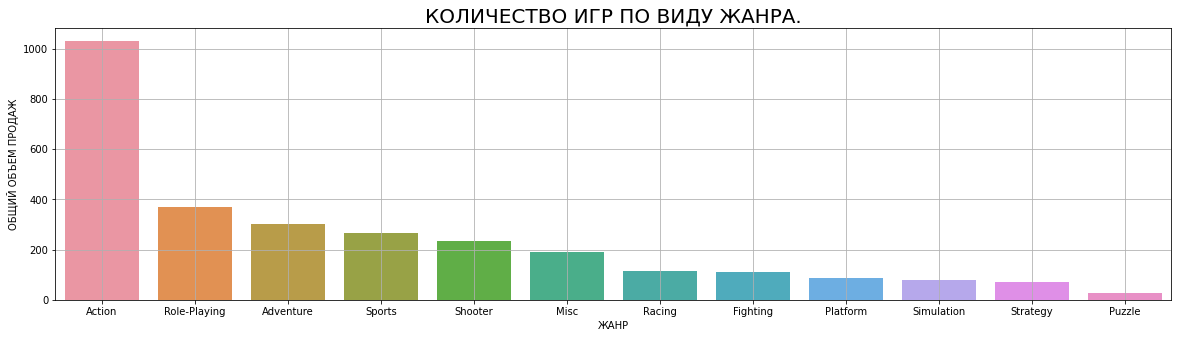

In [31]:
genre = data_actual.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False).reset_index()
plt.figure(figsize=(20, 5))
plt.title('КОЛИЧЕСТВО ИГР ПО ВИДУ ЖАНРА.', fontsize=20)
sns.barplot(x='genre', y='name', data=genre)
plt.ylabel('ОБЩИЙ ОБЪЕМ ПРОДАЖ')
plt.xlabel('ЖАНР')
plt.grid(True);

Больше всего игр на рынке в жанре - "Action", а меньше всего "Puzzle".

<font color='Black'><b>Общий вывод после исследовательского анализа данных:  </b></font><br>
- Рост количества выпускаемых компьютерных игр идет в период с 1991 по 2008 год, в 2008 максимальное количество выпущенных игр 1427. После 2008 количество выпускаемых игр идет на спад. До 1991 года количество игр держится примерно на одном уровне.
- Характерный срок появления новой и исчезновения старой платформы - около 10 лет.
- Самая большая прибыль (по убыванию) у платформ с 2012г. по 2016г.:
  - PS4
  - PS3
  - X360
  - 3DS
  - XOne
- Потенциально прибыльными в 2017г. (растущими) платформами будут:
  - PS4
  - XOne
  - 3DS
- Продажи падают у платформ:
  - PS3
  - X360
  - Wii
- Большего всего продаются (2012-2016) игры для:
  - PS3
  - X360
  - PS4
  - XOne
  - WiiU
  - Wii
- Зависимость количества продаж от оценки критиков есть, но слабая. Корреляция положительная (лучше отзыв - больше продаж).
- Зависимость продаж от оценки пользователей почти отсутствует.
- Самый популярный жанр - "Shooter", у него больше всего продаж, а меньше всего у "Adventure", этот жанр менее популярен.
- Больше всего игр на рынке в жанре - "Action", а меньше всего "Puzzle".

#### Составление портрета пользователя каждого региона

4.1 Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Опишем различия в долях продаж. 

самые популярные платформы (топ-5) в Северной Америке: 

In [32]:
na_users = data_actual.pivot_table(index='platform',values=['na_sales','sum_sales'],aggfunc=('sum'))
na_users = na_users.sort_values(by='na_sales',ascending=False).head(5)
na_users['%'] = (na_users['na_sales'] / na_users['sum_sales']) * 100
na_users = na_users.reset_index()
na_users

,platform,na_sales,sum_sales,%
0,X360,140.05,236.54,59.207745
1,PS4,108.74,314.14,34.615140
2,PS3,103.38,288.79,35.797638
3,XOne,93.12,159.32,58.448406
4,3DS,55.31,194.61,28.420944


самые популярные платформы (топ-5) в Европе:

In [33]:
eu_users = data_actual.pivot_table(index='platform',values=['eu_sales','sum_sales'],aggfunc=('sum'))
eu_users = eu_users.sort_values(by='eu_sales',ascending=False).head(5)
eu_users['%'] = (eu_users['eu_sales'] / eu_users['sum_sales']) * 100
eu_users = eu_users.reset_index()
eu_users

,platform,eu_sales,sum_sales,%
0,PS4,141.09,314.14,44.913096
1,PS3,106.86,288.79,37.002666
2,X360,74.52,236.54,31.504185
3,XOne,51.59,159.32,32.381371
4,3DS,42.64,194.61,21.910488


самые популярные платформы (топ-5) в Японии:

In [34]:
jp_users = data_actual.pivot_table(index='platform',values=['jp_sales','sum_sales'],aggfunc=('sum'))
jp_users = jp_users.sort_values(by='jp_sales',ascending=False).head(5)
jp_users['%'] = (jp_users['jp_sales'] / jp_users['sum_sales']) * 100
jp_users = jp_users.reset_index()
jp_users

,platform,jp_sales,sum_sales,%
0,3DS,87.79,194.61,45.110734
1,PS3,35.29,288.79,12.219952
2,PSV,21.04,49.18,42.781619
3,PS4,15.96,314.14,5.080537
4,WiiU,13.01,82.19,15.829176


самые популярные платформы (топ-5) в других странах:

In [35]:
other_users = data_actual.pivot_table(index='platform',values=['other_sales','sum_sales'],aggfunc=('sum'))
other_users = other_users.sort_values(by='other_sales',ascending=False).head(5)
other_users['%'] = (other_users['other_sales'] / other_users['sum_sales']) * 100
other_users = other_users.reset_index()
other_users

,platform,other_sales,sum_sales,%
0,PS4,48.35,314.14,15.391227
1,PS3,43.26,288.79,14.979743
2,X360,20.40,236.54,8.624334
3,XOne,14.27,159.32,8.956816
4,3DS,8.87,194.61,4.557834


Вывод:
- популярные платформы в Северной Америке на первом месте Xbox360 и на 4-м XboxOne - занимают больше половины общих продаж.
- самая популярная платформа в Европе является - PS4 (почти 45% от общих продаж), следом идет PS3 и тд.
- самые популярные платформы в Японии являются платформы японского производства.
- категории "в другие страны" ситуация как в Европе, только процент от общих продаж гораздо меньше.

4.2 Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). 


самые популярные жанры (топ-5) в Северной Америке:

In [36]:
na_users_genre = data_actual.pivot_table(index='genre', values=['na_sales'], aggfunc=('sum'))
na_users_genre = na_users_genre.sort_values(by='na_sales', ascending=False).head(5)
na_users_genre = na_users_genre.reset_index()
na_users_genre

,genre,na_sales
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19


самые популярные жанры (топ-5) в Европе:

In [37]:
eu_users_genre = data_actual.pivot_table(index='genre', values=['eu_sales'], aggfunc=('sum'))
eu_users_genre = eu_users_genre.sort_values(by='eu_sales', ascending=False).head(5)
eu_users_genre = eu_users_genre.reset_index()
eu_users_genre

,genre,eu_sales
0,Action,159.34
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29


самые популярные жанры (топ-5) в Японии:

In [38]:
jp_users_genre = data_actual.pivot_table(index='genre', values=['jp_sales'], aggfunc=('sum'))
jp_users_genre = jp_users_genre.sort_values(by='jp_sales', ascending=False).head(5)
jp_users_genre = jp_users_genre.reset_index()
jp_users_genre

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44


самые популярные жанры (топ-5) в других странах:

In [39]:
other_users_genre = data_actual.pivot_table(index='genre', values=['other_sales'], aggfunc=('sum'))
other_users_genre = other_users_genre.sort_values(by='other_sales', ascending=False).head(5)
other_users_genre = other_users_genre.reset_index()
other_users_genre

,genre,other_sales
0,Action,51.14
1,Shooter,37.26
2,Sports,22.44
3,Role-Playing,14.83
4,Misc,7.67


Вывод: 
- Популярные жанры полностью совпадают в Северной Америке и в категории "в другие страны", а в Европе отличается лишь последний жанр.
- В Японии другая картина: на первом месте "Role-Playing", после - "Action" и тд.

Разница в предпочтении жанров может быть обусловлена предпочтением определенных консолей.  

4.3 Определим для пользователя каждого региона (NA, EU, JP) влияет ли рейтинг ESRB на продажи в отдельном регионе?

rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [40]:
data_actual['rating'].unique()

array(['M', '', 'E', 'E10+', 'T'], dtype=object)

- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.


влияние рейтинга ESRB на продажи в Северной Америке:

In [41]:
na_ESRB = data_actual.pivot_table(index='rating', values='na_sales', aggfunc=('sum'))
na_ESRB = na_ESRB.sort_values(by='na_sales', ascending=False)
na_ESRB = na_ESRB.reset_index()
na_ESRB

,rating,na_sales
0,M,231.57
1,E,114.37
2,,103.31
3,E10+,75.70
4,T,66.02


влияние рейтинга ESRB на продажи в Европе:

In [42]:
eu_ESRB = data_actual.pivot_table(index='rating', values='eu_sales', aggfunc=('sum'))
eu_ESRB = eu_ESRB.sort_values(by='eu_sales', ascending=False)
eu_ESRB = eu_ESRB.reset_index()
eu_ESRB

,rating,eu_sales
0,M,193.96
1,E,113.03
2,,91.50
3,E10+,55.37
4,T,52.96


влияние рейтинга ESRB на продажи в Японии:

In [43]:
jp_ESRB = data_actual.pivot_table(index='rating', values='jp_sales', aggfunc=('sum'))
jp_ESRB = jp_ESRB.sort_values(by='jp_sales', ascending=False)
jp_ESRB = jp_ESRB.reset_index()
jp_ESRB

,rating,jp_sales
0,,108.84
1,E,28.33
2,T,26.02
3,M,21.20
4,E10+,8.19


влияние рейтинга ESRB на продажи в других странах:

In [44]:
other_ESRB = data_actual.pivot_table(index='rating', values='other_sales', aggfunc=('sum'))
other_ESRB = other_ESRB.sort_values(by='other_sales', ascending=False)
other_ESRB = other_ESRB.reset_index()
other_ESRB

,rating,other_sales
0,M,63.38
1,E,31.44
2,,27.17
3,T,17.94
4,E10+,16.23


Выводы: 

- во всех регионах кроме Японии первые 2 места по возрастному рейтингу занимают игры 17+ и 6+ 
- в Японии первые места у игр "без рейтинга" и 6+ 
- много игр с неопределенным рейтингом

<font color='Black'><b>Общий вывод после составления портрета пользователя каждого региона:  </b></font><br>

Продажи:
- Популярные платформы в Северной Америке на первом месте Xbox360 и на 4-м XboxOne - занимают больше половины общих продаж.
- Самая популярная платформа в Европе является - PS4 (почти 45% от общих продаж), следом идет PS3 и тд.
- Самые популярные платформы в Японии являются платформы японского производства.
- Категории "в другие страны" ситуация как в Европе, только процент от общих продаж гораздо меньше.

Жанры:
- Популярные жанры полностью совпадают в Северной Америке и в категории "в другие страны", а в Европе отличается лишь последний жанр.
- В Японии другая картина: на первом месте "Role-Playing", после - "Action" и тд.

Разница в предпочтении жанров может быть обусловлена предпочтением определенных консолей.



Рейтинг ESRB (возрастная категория):
- Во всех регионах кроме Японии первые 2 места по возрастному рейтингу занимают игры 17+ и 6+.
- В Японии первые места у игр "без рейтинга" и 6+
- Много игр с неопределенным рейтингом.

#### Проверка гипотез

Нулевая гипотеза (H₀) всегда формируется так, чтобы использовать знак равенства.
Исходя из формулировки H₀ формуриуется альтернативная гипотеза (H₁). Это утверждение, которое принимается верным, когда отбрасывается нулевая гипотеза.


Логика проверки:

Вычислю значение (p-value) получить наблюдаемое на выборке значение, при условии, что H₀ верна. Если значение будет большим (сравним с пороговым значением), то нулевую гипотезу не отвергаем.

5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Гипотеза:

H₀: Средние пользовательские рейтинги платформ Xbox One и PC равны.

H₁: Средние пользовательские рейтинги платформ Xbox One и cредние пользовательские рейтинги платформы PC не равны.

Гипотеза о равенстве средних двух генеральных совокупностей


In [45]:
data_actual = data_actual[data_actual['user_score'] != -1]

In [46]:
XOne = data_actual.query(' platform == "XOne" ')['user_score'].dropna().to_list() 
PC = data_actual.query(' platform == "PC" ')['user_score'].dropna().to_list()

In [47]:
print('Дисперсия XOne =', np.var(XOne))

Дисперсия XOne = 1.8965188383045526


In [48]:
print('Дисперсия PC =', np.var(PC))

Дисперсия PC = 2.7569952398906588


In [49]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(XOne, PC, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Итог проверки: пользовательские рейтинги не различаются.

5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Гипотеза:

H₀: Средние пользовательские рейтинги жанра Action равны cредним пользовательским рейтингам жанра Sports.

H₁: Средние пользовательские рейтинги жанров Action и cредние пользовательские рейтинги пжанра Sports различаются. Альтернативная гипотеза говорит о проверке равенства средних двух генеральных совокупностей.


In [50]:
data_actual = data_actual[data_actual['user_score'] != -1]

In [51]:
Action = data_actual.query(' genre == "Action" ')['user_score'].dropna().to_list() 
Sports = data_actual.query(' genre == "Sports" ')['user_score'].dropna().to_list()

In [52]:
print('Дисперсия Action =', np.var(Action))

Дисперсия Action = 1.8854720340439224


In [53]:
print('Дисперсия Sports =', np.var(Sports))

Дисперсия Sports = 3.0073882971729127


In [54]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(Action, Sports, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Итог проверки: Пользовательские рейтинги жаров Action и Sports различаются.

#### Общий вывод по проекту

Для интернет-магазина «Стримчик» были проанализированы исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

Определяющие успешность игры закономерности: 
- Популярность жанра.
- Популярность платформ.
- Популрность возрастного рейтинга.
- Мнение критиков, как возможное привлечение дополнительной игровой аудитории.
- Будущие перспективные платформы.

Популярные направления для регионов:

Северная Америка
- Плафторма: X360, PS4
- Жанр: Action, Shooter
- Рейтинг: m, e

Европа
- Плафторма: PS4, PS3 
- Жанр: Action, Shooter
- Рейтинг: m, e

Япония
- Плафторма: 3DS, PS3
- Жанр: Role-Playing, Action
- Рейтинг: e, t

<b>Общий вывод по проекту</b></font><br>

Для интернет-магазина «Стримчик» были проанализированы исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.


1. Проведена предобработка данных:
- заменили названия столбцов;
- преобразовали данные в нужные типы данных;
- обработали пропуски;
- посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.
    
    
2. После исследовательского анализа данных выяснили, что:
- Рост количества выпускаемых компьютерных игр идет в период с 1991 по 2008 год, в 2008 максимальное количество выпущенных игр 1427. После 2008 количество выпускаемых игр идет на спад. До 1991 года количество игр держится примерно на одном уровне.
- Характерный срок появления новой и исчезновения старой платформы - около 10 лет.
- Самая большая прибыль (по убыванию) у платформ с 2012г. по 2016г.: PS4, PS3, X360, 3DS, XOne
- Потенциально прибыльными в 2017г. (растущими) платформами будут: PS4, XOne, 3DS
- Продажи падают у платформ: PS3, X360, Wii
- Большего всего продаются (2012-2016) игры для: PS3, X360, PS4, XOne, WiiU, Wii
- Зависимость количества продаж от оценки критиков есть, но слабая. Корреляция положительная (лучше отзыв - больше продаж).
- Зависимость продаж от оценки пользователей почти отсутствует.
- Самый популярный жанр - "Shooter", у него больше всего продаж, а меньше всего у "Adventure", этот жанр менее популярен.
- Больше всего игр на рынке в жанре - "Action", а меньше всего "Puzzle".
    
    
    
3. Составили портрет пользователя каждого региона:

Продажи:
- Популярные платформы в Северной Америке на первом месте Xbox360 и на 4-м XboxOne - занимают больше половины общих продаж.
- Самая популярная платформа в Европе является - PS4 (почти 45% от общих продаж), следом идет PS3 и тд.
- Самые популярные платформы в Японии являются платформы японского производства.
- Категории "в другие страны" ситуация как в Европе, только процент от общих продаж гораздо меньше.

Жанры:
- Популярные жанры полностью совпадают в Северной Америке и в категории "в другие страны", а в Европе отличается лишь последний жанр.
- В Японии другая картина: на первом месте "Role-Playing", после - "Action" и тд.
Разница в предпочтении жанров может быть обусловлена предпочтением определенных консолей.

Рейтинг ESRB (возрастная категория):
- Во всех регионах кроме Японии первые 2 места по возрастному рейтингу занимают игры 17+ и 6+.
- В Японии первые места у игр "без рейтинга" и 6+
- Много игр с неопределенным рейтингом.

4. Были проверены гипотезы, а именно:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Итог проверки: пользовательские рейтинги не различаются.
- Средние пользовательские рейтинги жанров Action и Sports разные. Итог проверки: Пользовательские рейтинги жаров Action и Sports различаются.




Выявлены определяющие успешность игры закономерности, а именно:
- Популярность жанра.
- Популярность платформ.
- Популрность возрастного рейтинга.
- Мнение критиков, как возможное привлечение дополнительной игровой аудитории.
- Будущие перспективные платформы.
- Популярные направления для регионов:


